Linear Regression Model From Scratch
(No Sklearn)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import random 
import pickle

Main Ideas we need to cover:
1) Use least-squares to fit a line to the data
2) Calculate R^2
3) Calculate a p-value for R^2

In [2]:
stock = 'AAPL'
data = yf.download(stock, start='2020-01-01', end='2025-01-01')
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716080  72.776606  71.466820  71.721026  135480400
2020-01-03  72.009109  72.771737  71.783954  71.941321  146322800
2020-01-06  72.582909  72.621646  70.876075  71.127866  118387200
2020-01-07  72.241531  72.849208  72.021215  72.592578  108872000
2020-01-08  73.403664  73.706294  71.943774  71.943774  132079200


In [3]:
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
print("Simplified Columns:", data.columns)

Simplified Columns: Index(['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL'], dtype='object')


In [4]:
data['Returns_AAPL'] = data['Close_AAPL'].pct_change()
data.dropna(inplace=True)
print(data)

            Close_AAPL   High_AAPL    Low_AAPL   Open_AAPL  Volume_AAPL  \
Date                                                                      
2020-01-03   72.009109   72.771737   71.783954   71.941321    146322800   
2020-01-06   72.582909   72.621646   70.876075   71.127866    118387200   
2020-01-07   72.241531   72.849208   72.021215   72.592578    108872000   
2020-01-08   73.403664   73.706294   71.943774   71.943774    132079200   
2020-01-09   74.962791   75.156472   74.132375   74.384158    170108400   
...                ...         ...         ...         ...          ...   
2024-12-24  257.916443  257.926411  255.009620  255.209412     23234700   
2024-12-26  258.735504  259.814335  257.347047  257.906429     27237100   
2024-12-27  255.309296  258.415896  252.782075  257.546826     42355300   
2024-12-30  251.923019  253.221595  250.474615  251.952985     35557500   
2024-12-31  250.144974  253.001833  249.156056  252.162760     39480700   

            Returns_AAPL

In [5]:
X= data[['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Volume_AAPL']]
y = data['Close_AAPL']
print(X)
print(y)

             Open_AAPL   High_AAPL    Low_AAPL  Volume_AAPL
Date                                                       
2020-01-03   71.941321   72.771737   71.783954    146322800
2020-01-06   71.127866   72.621646   70.876075    118387200
2020-01-07   72.592578   72.849208   72.021215    108872000
2020-01-08   71.943774   73.706294   71.943774    132079200
2020-01-09   74.384158   75.156472   74.132375    170108400
...                ...         ...         ...          ...
2024-12-24  255.209412  257.926411  255.009620     23234700
2024-12-26  257.906429  259.814335  257.347047     27237100
2024-12-27  257.546826  258.415896  252.782075     42355300
2024-12-30  251.952985  253.221595  250.474615     35557500
2024-12-31  252.162760  253.001833  249.156056     39480700

[1257 rows x 4 columns]
Date
2020-01-03     72.009109
2020-01-06     72.582909
2020-01-07     72.241531
2020-01-08     73.403664
2020-01-09     74.962791
                 ...    
2024-12-24    257.916443
2024-12-26    2

In [6]:
X = np.array(X)
indices = np.random.permutation(len(X))

In [7]:
train_ratio = 0.8
split_index = int(len(X)*train_ratio)

In [8]:
x_train = X[indices[:split_index]]
x_test = X[indices[split_index:]]
y_train = np.array(y)[indices[:split_index]]
y_test = np.array(y)[indices[split_index:]]

print("x:train:", x_train)
print("x_test:", x_test)
print("y_train:", y_train)
print("y-test:", y_test)

x:train: [[1.96838199e+02 1.98428641e+02 1.94989299e+02 6.68316000e+07]
 [1.69272914e+02 1.72559774e+02 1.69055109e+02 1.13316400e+08]
 [1.55274047e+02 1.56655673e+02 1.51583164e+02 1.01696800e+08]
 ...
 [2.32099163e+02 2.32957275e+02 2.29045886e+02 4.70709000e+07]
 [1.33217531e+02 1.41704601e+02 1.32605662e+02 1.13224000e+08]
 [2.42603257e+02 2.43841901e+02 2.40985041e+02 4.43839000e+07]]
x_test: [[1.74302505e+02 1.76287953e+02 1.73835924e+02 5.47644000e+07]
 [1.33510264e+02 1.34009176e+02 1.31475521e+02 7.30466000e+07]
 [1.82687385e+02 1.83622970e+02 1.80497727e+02 6.54345000e+07]
 ...
 [1.48700387e+02 1.49789411e+02 1.46928265e+02 5.88672000e+07]
 [7.75414508e+01 7.80840927e+01 7.68625412e+01 1.02688800e+08]
 [8.95111406e+01 9.01486796e+01 8.84866982e+01 1.14041600e+08]]
y_train: [196.92765808 171.83706665 151.70158386 ... 229.59468079 141.11248779
 242.74310303]
y-test: [174.56060791 132.44398499 182.9959259  171.08335876  75.13225555
 147.38897705 246.21928406 124.57496643 180.706

Preprocessing:

PCA (Principal Component Analysis)
1: Standardize.
2: Covariance Matrix.
3. Eigen Decomp.
4. Sort Eigenvalues.
5. transform.

In [9]:
mean = np.mean(x_test, axis=0)
std = np.std(x_test, axis=0)
x_test_standard = (x_test - mean) / std
x_train_standard = (x_train - mean) / std
print(x_test_standard)

[[ 0.57560555  0.58477172  0.60034461 -0.67680454]
 [-0.36922656 -0.3910661  -0.3839654  -0.31499793]
 [ 0.76981659  0.75407147  0.75514201 -0.46564217]
 ...
 [-0.0173921  -0.02684199 -0.0248968  -0.59560971]
 [-1.66557924 -1.68187472 -1.65298317  0.27162425]
 [-1.38833663 -1.40341161 -1.38287776  0.49629732]]


What this is doing is we're using z-score formula which is 
z = (x-(mean))/std. 

In [10]:
cov_matrix = np.cov(x_test_standard, rowvar=False)
print(cov_matrix)

[[ 1.00398406  1.00355776  1.00363809 -0.69146841]
 [ 1.00355776  1.00398406  1.00354175 -0.68349201]
 [ 1.00363809  1.00354175  1.00398406 -0.69470696]
 [-0.69146841 -0.68349201 -0.69470696  1.00398406]]


We now make a covariance matrix which tells us the magnitude/direction of these standardized values.

Facts about covariance matrixes:
they're nxn symmetric
the diagonal entries are all equal
upper and lower triangular portions are also equal
mainly looking at the sign of the numbers

Negative: One increases / other decreasing (inversely correlated)
Positive: Both increase / decreases (correlated)

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

Now we're using lin-alg to find the eigenvalues/ eigenvectors which they're "n" sets for the amount of dim the matrix has. 

We're basically finding out how much varience on the data by calculating the eigen stuff.

In [12]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print(sorted_eigenvalues)

[3.56801923e+00 4.47232681e-01 3.67533041e-04 3.16805725e-04]


We then sorted it in increasing order.

In [13]:
m = 2
top_eigenvectors = sorted_eigenvectors[:, :m]
x_test_reduced = np.dot(x_test_standard, top_eigenvectors)
x_train_reduced = np.dot(x_train_standard, top_eigenvectors)

We then reduced to a 1 dimensional array and then we took the dotproduct of the two vectors which results us with new data on a new plane.

Normal Equation (Without Gradient Descent):

In [14]:
X = np.hstack([np.ones((x_train_reduced.shape[0], 1)),x_train_reduced])
w = np.linalg.inv(X.T @ X) @ X.T @ y_train

bias = w[0]
coeff = w[1:]
print("Bias:", bias)
print("Coeff:", coeff)

Bias: 149.5999096857082
Coeff: [ 22.61601802 -10.46327046]


We used our preprocessed data (1D and normalized) to stack it hstack (horizontal stacking) then inverting it. This means we're reconstructing the original data from our reduced-dimension array.

In [15]:
y_pred = np.dot(x_test_reduced, w[1:]) + w[0]
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.5576183444373


We now found our mean squared error. Is this good compared to our target value (y)?

In [16]:
range_y = np.max(y_train) - np.min(y_train)
std_y = np.std(y_train)

print(f"Range of y: {range_y}")
print(f"Standard Deviation of y: {std_y}")

Range of y: 204.28560638427734
Standard Deviation of y: 41.67867806180775


In [17]:
y_mean = np.mean(y_test)

ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - y_mean) ** 2)

r_squared = 1 - (ss_res / ss_tot)

print("R^2 Score:", r_squared)


R^2 Score: 0.9991659141113155


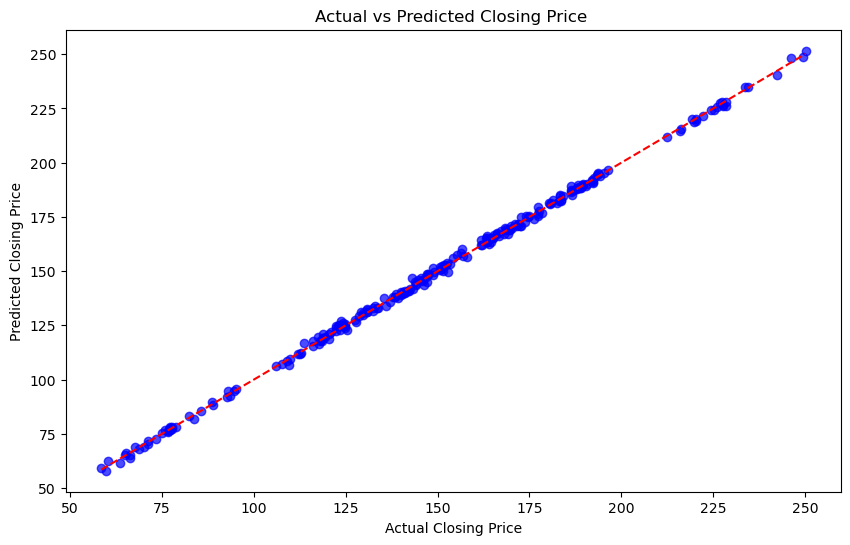

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red',linestyle='--')

plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs Predicted Closing Price ')
plt.show()

New Equation (With Gradient Descent & regularization):

In [19]:
w = np.zeros(x_train_reduced.shape[1])
b = 0
LR = 0.01
lambda_l1 = 0.00001
lambda_l2 = 0.00001
n = len(x_train_reduced)
iterations = 1000
for _ in range(iterations):
    y_pred2 = x_train_reduced @ w + b

    dw= (-2/n) * x_train_reduced.T @ (y_train - y_pred2) + lambda_l1 * np.sign(w) + 2 * lambda_l2 * w
    db = (-2/n) * np.sum(y_train - y_pred2)

    w -= LR * dw
    b -= LR * db
print(f"Optimal weights: {w}")
print(f"Optimal biases: {b}")

Optimal weights: [ 22.61595269 -10.46331877]
Optimal biases: 149.59988125333072


Here we set a random weight and biases and we go through "n" amount of iterations to give us the most optimal weight and bias. 

For Regularization, I expirmented by changing lambda1 and lambda2 and I concluded that when I did 0.01, it underfitted my weights results in huge percentage error. 0.0001 made my error a lot less so I'm sticking with this.

In [20]:
y_test_pred = x_test_reduced @ w + b
test_mse = np.mean((y_test - y_test_pred) ** 2)
print(f"Mean Squared Error using Gradient Descent: {test_mse}")

Mean Squared Error using Gradient Descent: 1.5575989591657822


Let's compare the base mse to the optimized mse.

In [21]:
base_rmse = np.sqrt(mse)
optimized_rmse = np.sqrt(test_mse)

print(f"Baseline RMSE: {base_rmse}")
print(f"Optimized RMSE: {optimized_rmse}")

Baseline RMSE: 1.2480458102318601
Optimized RMSE: 1.2480380439577081


In [22]:
relative_error_base_range = base_rmse / range_y
relative_error_opt_range = optimized_rmse / range_y
relative_error_base_std = base_rmse / std_y
relative_error_opt_std = optimized_rmse / std_y

print(f"Relative Error of Base, Range: {relative_error_base_range}")
print(f"Relative Error of Optimized, Range: {relative_error_opt_range}")
print(f"Relative Error of Base, STDEV: {relative_error_base_std}")
print(f"Relative Error of Optimized, STDEV: {relative_error_opt_std}")

Relative Error of Base, Range: 0.006109318381854997
Relative Error of Optimized, Range: 0.0061092803651082985
Relative Error of Base, STDEV: 0.029944467249682437
Relative Error of Optimized, STDEV: 0.029944280912818765


In [23]:
percentage_improv = ((mse - test_mse) / mse) * 100
print(f"Percentage Improvement: {percentage_improv:.2f}%")

Percentage Improvement: 0.00%


Evaluation:

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
data['Returns_AAPL'] = data['Close_AAPL'].pct_change()
data.dropna(inplace=True)
X2= data[['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Volume_AAPL']]
y2 = data['Close_AAPL']

In [26]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train2, y_train2)

LinearRegression()

In [27]:
y_pred2 = model.predict(X_test2)
mse_modeled = mean_squared_error(y_test2, y_pred2)
r2_modeled = r2_score(y_test2, y_pred2)
print(f'Mean Squared Error: {mse_modeled:.2f}')
print(f'R^2 Score: {r2_modeled:.2f}')

Mean Squared Error: 1.01
R^2 Score: 1.00


In [28]:
coefficients = pd.DataFrame(model.coef_, index=X2.columns, columns=['Coefficient'])
print(coefficients)

              Coefficient
Open_AAPL   -6.024007e-01
High_AAPL    8.297779e-01
Low_AAPL     7.722258e-01
Volume_AAPL -7.852907e-10


Conclusion:

In this project, I implemented a linear regression model from scratch to predict Apple Inc.'s stock closing prices using historical financial data. The implementation involved several steps, including preprocessing the data with Principal Component Analysis (PCA), fitting the model using both the normal equation and gradient descent, and evaluating the model's performance using metrics like Mean Squared Error and R^2 Score. To validate my results, I compared my custom implementation with sklearn's Linear Regression.

Steps:

1. Data Preprocessing -
    I downloaded historial stock data for AAPL using the yfinance library. To reduce dimensionality, I appled PCA after standardizing the features using z-score normalization. This reduces the feature space to two components, which captures the most variance in my data.
2. Model Fitting - 
    Using preprocessed data, I implemented linear regression in two ways:
        Normal Equation: Closed form solution to compute optimate weight and biases. 
        Gradient Descent: Optimization method that incorporates L1 (Lasso) and (Ridge) regularization to prevent overfitting.
3. Evaluation - 
    I evaluated the model's performance using Mean Squared Error and R^2 score. I also created a visualization which showed the predicted vs actual closing prices to assess the model's predictive accuracy.
4. Comparison - 
    To benchmark my custom implementation, I trained sklearn's LinearRegression model to the same dataset. However, I observed MSE between two implementations.

Why do the MSE differ?

1. My custom implementation applies PCA to reduce the feature space but sklearn operates directly on the raw features.
2. Feature scaling was another thing which I standardized the data where sklearn doesn't require it.
3. Optimization and Regularization was anothe thing which sklearn doesn't use.

Insights Gained:

PCA: this was my first time reducing a dimensionality and simplifying the feature space.
Regularization: Incorporating L1 and L2 helped mitigate overfitting and improved the model's generation ability.
Gradient Descent: Implementing gradient descent from scratch deepened my understanding of optimization because I only wrote notes on it and using terms like learning rate and regularization strength made me more knowledgeable.
MSE and R^2: Evaluating the model allowed me quantify the predictive accuracy and compare it to sklearn's implementation

Future?:

To improve the alignment between my custom implementation and sklearn I could,

Apply PCA for both implementations
Experiment with different preprocessing techniques

Final Thoughts:

This project was hard to start but once I understood the concepts on linear regression, it slowely became more better. This project demonstrates the importance of understanding the mechanics of machine learning algorithms and the impact of preprocessing, optimization, and evaluation choices. By addressing the differences in my data for future work, I can refine my implementations and achieve better alignment with the library solutions.